# Difference & Difference Analysis
## National Voter Turnout

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
turnout = pd.read_csv('../20_intermediate_files/turnout_v3.csv', 
                      index_col=0)

### Difference in Difference Analysis

In [3]:
# Number of states and mean voter turnout in each year-treatment group
( 
    turnout
    .filter(items=['treatment', 'Year', 'VEP_Counted'])
    .groupby(['treatment', 'Year'])
    .agg(['count','mean'])
)

VEP_Counted           
                     count       mean
treatment Year                       
0         2008          46  27.939130
          2012          43  14.125581
          2016          42  27.790476
          2020          21  22.809524
1         2008           4   5.150000
          2012           9   3.400000
          2016           7  11.342857
          2020           5  30.740000

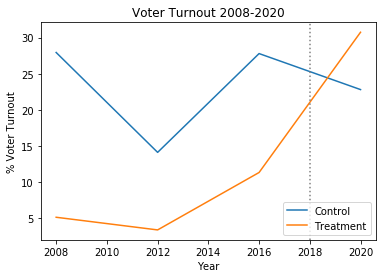

In [4]:
# Voter primary turnout trends from 2008-2020
tbl = ( 
    turnout
    .filter(items=['treatment', 'Year', 'VEP_Counted'])
    .groupby(['treatment', 'Year'])
    .agg('mean')
)

plt.plot(tbl.loc[0], label = "Control")
plt.plot(tbl.loc[1], label = "Treatment")
plt.title('Voter Turnout 2008-2020')
plt.legend()
plt.xlabel('Year')
plt.ylabel('% Voter Turnout')
plt.axvline(x=2018, color='grey', linestyle=':')
plt.show()

In [5]:
# Custom format number
def custom_format(x):
    return round(float(x),1)

In [6]:
# Casual effect
for group in [0,1]:
    print(f'Voter turnout % delta for group {group}: {custom_format(tbl.loc[group].loc[2020] - tbl.loc[group].loc[2016])}')
    
print(f'\nThe causal effect for primary format elections is {custom_format((tbl.loc[1].loc[2020] - tbl.loc[1].loc[2016]) - (tbl.loc[0].loc[2020] - tbl.loc[0].loc[2016]))}')

Voter turnout % delta for group 0: -5.0
Voter turnout % delta for group 1: 19.4

The causal effect for primary format elections is 24.4
